# IEEE_Fraud_Data_Exploration


Code and analysis by **Edward Heronzy**

*Last Update: 10/9/2019*


## Overview

This is an analysis of the data provided by **Vesta Corporation** (https://trustvesta.com/) for the IEEE-CIS Fraud Detection competition on Kaggle. The analysis is done in Python using the Pandas, NumPy, Seaborn, Matplotlib.pyplot, and Os modules

### Imports, Path Creations, and Reading CSV files

#### Import Statements

Note the line 

```python 
%matplotlib inline
```

This line is required for drawing figures in Jupyter notebook using 
Matplotlib. Note that this does not enable the plots to be interactively 
resized or zoomed. Figure sizes must be coded with the "figsize" option

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

%matplotlib inline

#### Creation of File Paths

A root path leading to the directory containing the csv data files is stored as a global variable along with variables for the names of each individual csv file

In [2]:
FILE_DIR = 'C:/Users/edher/Desktop/ML/datasets/ieee-fraud-detection'

file1 = 'sample_submission.csv'
file2 = 'test_identity.csv'
file3 = 'test_transaction.csv'
file4 = 'train_identity.csv'
file5 = 'train_transaction.csv'

#### Reading the CSV files

The function
```python
os.path.join()
```
Is used to join the file names to the file directory path so that the CSV files can be read into Pandas DataFrames using the 
```python
pd.read_csv()
```
function

In [3]:
#test_identity = pd.read_csv(os.path.join(FILE_DIR, file2))
#test_transaction = pd.read_csv(os.path.join(FILE_DIR, file3))
train_identity = pd.read_csv(os.path.join(FILE_DIR, file4))
train_transaction = pd.read_csv(os.path.join(FILE_DIR, file5))

### Analyzing the Training Data

#### Train Identity

The **train_identity** DataFrame contains data related to the features of the person making the transaction and/or it's method. The **Primary Key** is the *TransactionID* feature which is also a **Foreign Key** referencing the **train_transaction** DataFrame

Panadas' 
```python
.info()
```
DataFrame method gives an overview of the range, number and name of features, feature data types, summary of feature data types, and the ammount of memory currently used by the DataFrame

In [4]:
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

We can se that the identity data contains 41 columns with 144233 transactions. There are 24 numercial features (23 float64 and 1 int64) and 17 categorical features (object). By looking at the total entries for each feature, it is clear that nearly all features contain missing values. This is a problem that will have to be addressed if any predictive models are to be trained on this data

Pandas'
```python
.describe()
```
DataFrame method returns the following features about the DataFrame's numerical features in the form of a Pandas DataFrame
- count
- mean
- standard devation (std)
- min
- 25th Percentile
- 50th Percentile
- 75th Percentile
- max

Since the method retures a DataFrame, the method
```python
.iloc[]
```
can be used to select specific rows and/or columns by row or column index numbers. I am using it in this case for display purposes as Jupyter will not display every feature if there are too many in the DataFrame. 

The following .iloc method tells python to return all rows from columns 0 through 10, non-inclusive

In [5]:
train_identity.describe().iloc[:,0:10]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000


In [6]:
train_identity.describe().iloc[:,10:20]

,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22
count,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000
mean,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708
std,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665
min,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000
25%,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000
50%,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000
75%,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000
max,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000


In [7]:
train_identity.describe().iloc[:,20:]

,id_24,id_25,id_26,id_32
count,4747.000000,5132.000000,5163.000000,77586.000000
mean,12.800927,329.608924,149.070308,26.508597
std,2.372447,97.461089,32.101995,3.737502
min,11.000000,100.000000,100.000000,0.000000
25%,11.000000,321.000000,119.000000,24.000000
50%,11.000000,321.000000,149.000000,24.000000
75%,15.000000,371.000000,169.000000,32.000000
max,26.000000,548.000000,216.000000,32.000000


There are a few notable things that we can discern from these metrics. 
1. As also shown from the .info() method as well, every single feature except for *TransactionID* and *id_01* has missing values which is seen by comparing each feature's "count" metric to the "count" of *TransactionID*
2. The feature *id_02* has a very high standard deviation relative to the other features
3. Features *id_1*, *id_4*, *id_6*, *id_8*, and *id_10* contain all negative values as both their min and max values are less than or equal to zero

We can use the 
```python
.isnull()
```
and 
```python
.sum()
```
methods to get the total number of null/NA values for each feature to get a better idea of how many values are missing for each feature. The .isnull() method returns a DataFrame where all values in the orignial are replaced by a *True* or *False* boolean indicating if the value is null/NA or not respectively. Since *True* is represented by 1 and *False* by 0, the .sum() method can add up all of the *True* fields for each column, giving a count of all null/NA value for each feature

In [8]:
train_identity.isnull().head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,True,True,False,False,True,True,True,...,False,True,True,True,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
train_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

As we can see, outside of *TransactionID*, *id_01* and *id_12* are the only features with not missing entires. Note that *id_12* did not appear in the .describe() results as it is a categorical feature, not numerical

Pandas DataFrames have a method
```python
.hist()
```
which allows for the plotting of histograms to represent the data distribution for numerical features. You can play with the bins and figsize options to get an appropriate representation of the data distributions and readable graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251BDCBB898>,
      dtype=object)

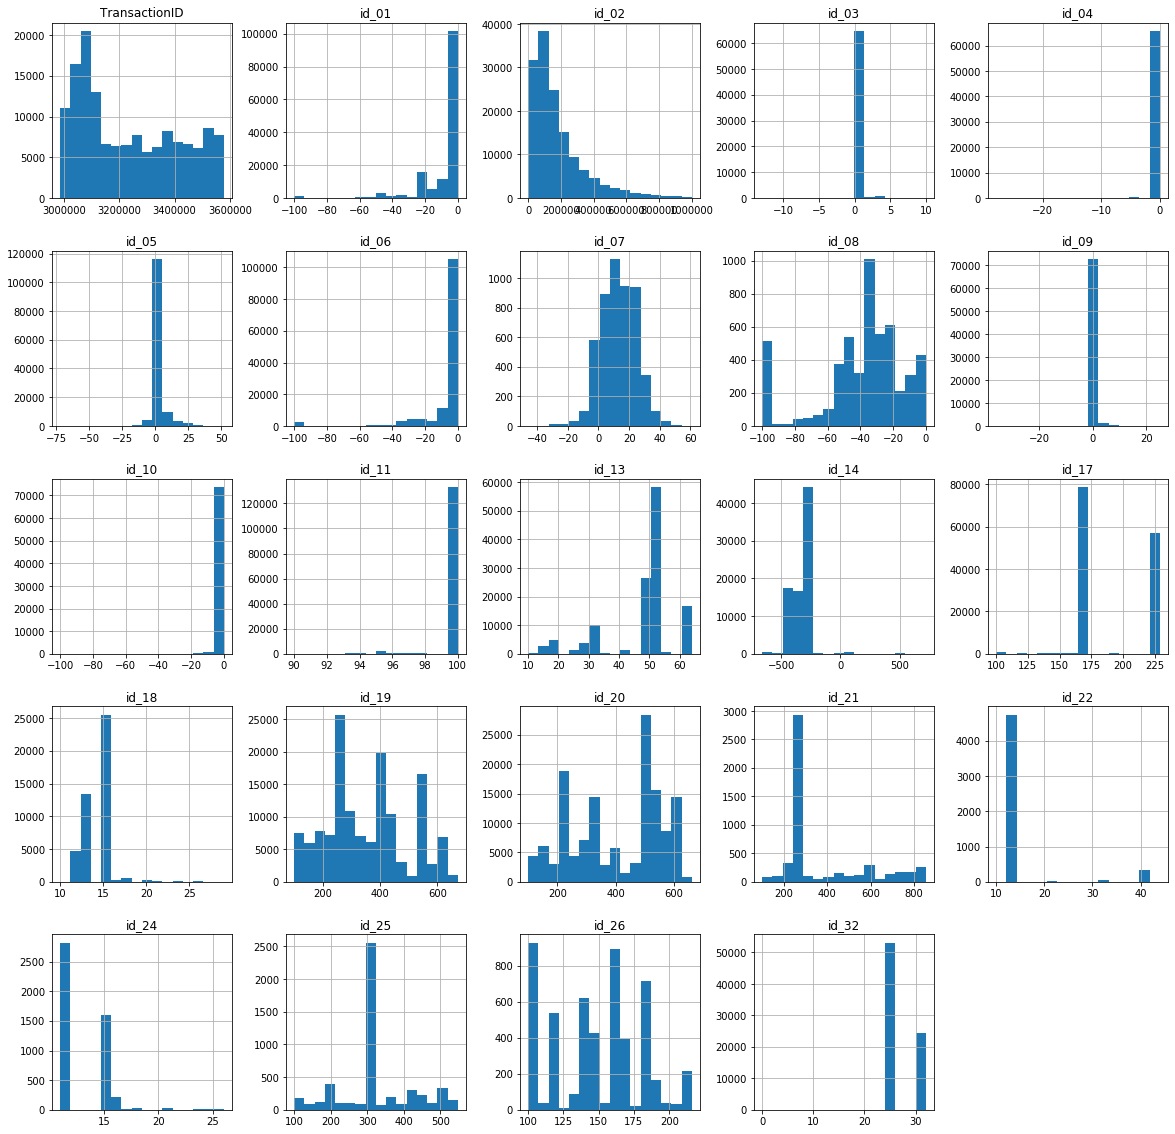

In [10]:
train_identity.hist(bins=16, figsize=(20,20))

 By looking at the various histograms, there is quite a bit of information we can discern from them
1. The *TransactionID* graph has unequal counts for each bin, meaning that the TransactionID's are not uniformly distributed. It seems as if the are significantly less TransactionID's after transaction number 3,150,000, which could suggest either some transactions are duplicated before number 3,150,000 or transactions are missing, many missing ones being over number 3,150,000
2. Features *id_01*, *id_06*, *id_11*, *id_14*, *id_22*, and *id_24* have very noticable outlying values (or in this case, clusters of values)
3. Features *id_02*, *id_18*, *id_14*, and *id_21* are noticably right skewed
4. Features *id_01*, *id_06*, *id_11*, and *id_13* are noticably left skewed
5. Feature *id_07* is roughly normally distributed
6. Feature *id_08* seems to have a noticable lower boundary at -100 where a lot of values seem to cluster and help to left skew the feature
7. Features *id_13*, *id_19*, *id_20*, *id_24*, and *id_26* have multiple peaks 

Seaborn provides another way to visualize these disbributions via **Violin Plots**
```python
sns.violinplot()
```
To start, we will use Matplotlib's pyplot method
```python
plt.subplots()
```
to initialize a figure with 3 rows, 3 columns, and of size 20X20. This will return two objects, a figure and axes. Then, we can use the sns.violinplot() method to create violin plots for the selected features. The data option specifies the DataFrame to look in, the x option specifies the name of the column to pull the data from, and the ax option takes a list with two values, one indicating where to plot the graph. For example...
```python
ax=axes[1,2]
```
tells the method to plot this graph on row index 1 (second row) and column index 2 (second column) or position 1,2

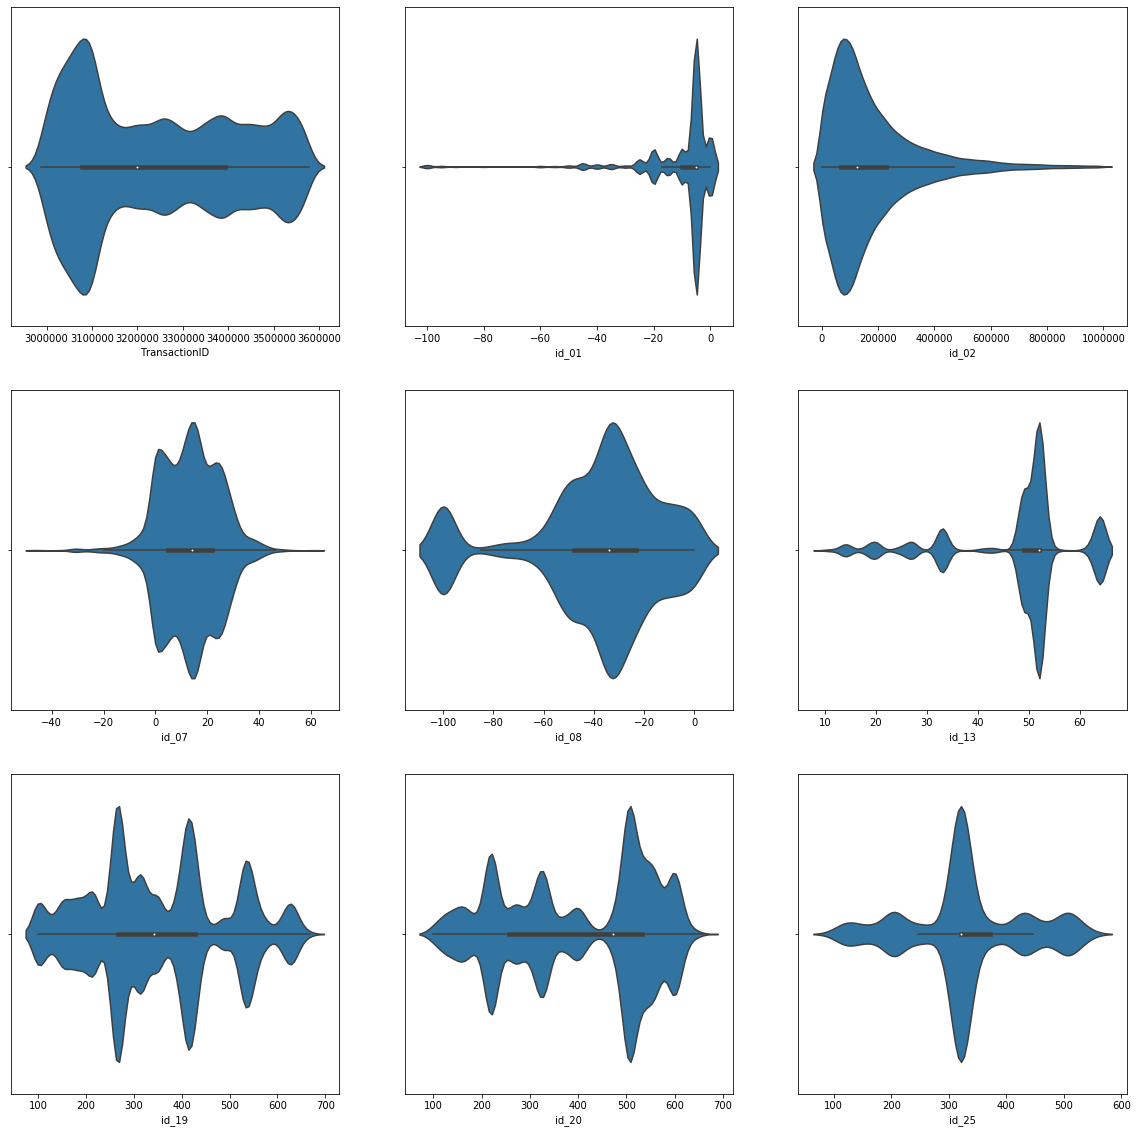

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
sns.violinplot(data=train_identity, x='TransactionID', ax=axes[0,0])
sns.violinplot(data=train_identity, x='id_01', ax=axes[0,1])
sns.violinplot(data=train_identity, x='id_02', ax=axes[0,2])
sns.violinplot(data=train_identity, x='id_07', ax=axes[1,0])
sns.violinplot(data=train_identity, x='id_08', ax=axes[1,1])
sns.violinplot(data=train_identity, x='id_13', ax=axes[1,2])
sns.violinplot(data=train_identity, x='id_19', ax=axes[2,0])
sns.violinplot(data=train_identity, x='id_20', ax=axes[2,1])
sns.violinplot(data=train_identity, x='id_25', ax=axes[2,2])

With these Violin Plots, the center white dot represents the median of the data, the thick line represents the interquartile range, and the thin lines represent the rest of the distribution (not including significant outliers). The outer lines making up the shape/curve of the plot are made using a kernal density estimation to represent visually the distribution of the data. Through this display of the data, it is easier to visualize the distribution of the data in a more qualitative representation. It is also easier to tell if the data is significantly skewed or not; if the median dot is to the left of center of the thick line, there is a right skew and if it is right of center, there is left skew. Keep in mind, that without factoring in major outliers, data skews may be shown to be less extreme than actual by this analysis method (see the graph for *id_08*). Some things we can discern from these plots...
- In the plot for *id_08*, we can more clearly see the concentration of outlying values at or around -100
- *id_07* is stil the closest to normally distributed
- The right skew for *id_02* is clearly visible
- There are clearly more transaction ids between 3,000,000 and 3,150,000
- *id_01* and *id_13* show the effects of outliers significantly left skewing their data

Now lets take a look at the categorical data

In [12]:
columns_cat = ['id_12','id_15','id_16',
               'id_23','id_27','id_28',
               'id_29','id_30','id_31',
               'id_33','id_34','id_35',
               'id_36','id_37','id_38',
               'DeviceType','DeviceInfo']
train_identity_cat = train_identity[columns_cat]

In [13]:
train_identity_cat.head(10).iloc[:,0:9]

,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31
0,NotFound,New,NotFound,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2
1,NotFound,New,NotFound,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0
2,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 62.0
3,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 62.0
4,NotFound,Found,Found,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0
5,NotFound,Found,Found,NaN,NaN,Found,Found,Windows 10,chrome 62.0
6,NotFound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Found,Found,Found,NaN,NaN,Found,Found,Android,chrome 62.0
8,NotFound,Found,Found,NaN,NaN,Found,Found,NaN,chrome 62.0
9,NotFound,New,NotFound,NaN,NaN,New,NotFound,NaN,chrome 62.0


In [14]:
train_identity_cat.head(10).iloc[:,9:]

,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,NaN,NaN,F,F,T,T,desktop,Windows
3,NaN,NaN,F,F,T,T,desktop,NaN
4,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,NaN,NaN,F,F,T,T,desktop,Windows
9,NaN,NaN,F,F,T,T,desktop,Windows


We can easily see the NaN values in some of the columns here, and we have a better idea of what some of these categorical features represent. 

- *id_12*, *id_15*, *id_16*, *id_28* and *id_29* seem to be binary "Found"/"NotFound" or "New"/"Found"
- *id_30* is the operating system used for the transaction
- *id_31* is the browser used for the transaction
- *id_33* appears to be resolution values
- *id_34* is some type of match_status classification
- *id_35*, *id_36*, *id_37* and *id_38* are all T/F values (as objects, not actual True/False booleans)

Using the DataFrame method
```python
.nunique()
```
We can get the number of unique values for each feature

In [15]:
train_identity_cat.nunique()

id_12            2
id_15            3
id_16            2
id_23            3
id_27            2
id_28            2
id_29            2
id_30           75
id_31          130
id_33          260
id_34            4
id_35            2
id_36            2
id_37            2
id_38            2
DeviceType       2
DeviceInfo    1786
dtype: int64

As we can see, many of these features only have a small number of different possible values. But *id_30*, *id_31*, *id_33*, and *DeviceInfo* have many possible values, which makes sense considering what they represent (OS, browser, resolution possibly, and device info). But, can we better visualize what these different values are? The follow code addresses this issue;

We will store column ids and their corresponding unique values as pairs in a list that we can print. The names of the columns in the train_identity_cat dataframe can be accessed directly by 
```python
train_identity_cat.columns
```
and looped through via a for loop the get the unique values for each column using the DataFrame method
```python
.unique()
```
The column name, unique value pairs will be appended to the storage list, and visualized at the end

In [16]:
t_unique = []

In [17]:
for column in train_identity_cat.columns:
    value = train_identity_cat[column].unique()
    t_unique.append([column, value])

In [18]:
for pair in t_unique:
    print("{0}: {1}".format(pair[0], pair[1]))

id_12: ['NotFound' 'Found']
id_15: ['New' 'Found' nan 'Unknown']
id_16: ['NotFound' 'Found' nan]
id_23: [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
id_27: [nan 'Found' 'NotFound']
id_28: ['New' 'Found' nan]
id_29: ['NotFound' 'Found' nan]
id_30: ['Android 7.0' 'iOS 11.1.2' nan 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'

Though we were unable to discern the type of values for features *id_23* and *id_27*, we can see them clearly now that they are IP_PROXY and binary Found/NotFound respectively. An interesting facet to note about the .nunique() and .unique() methods is that .nunique() will **not** factor in null/NA as unique values but .unique() will

#### Train Transaction

The **train_transaction** DataFrame contains data related to each transaction feature. The **Primary Key** is also *TransactionID* which also is a **Foreign Key** to the train_identity table. This table also contains the *isFraud* feature, which is the feature that any machine learn model would be train to predict.

In [19]:
train_transaction.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


We can see that the train_transaction table has significantly more features than the train_identity table, a total of 394 including 380 numerical features and 14 categorical features. Lets verify that there aren't any transactions missing from either table

In [21]:
train_transaction[['TransactionID']].nunique()

TransactionID    590540
dtype: int64

In [22]:
train_identity[['TransactionID']].nunique()

TransactionID    144233
dtype: int64

As we can see, there are fewer unique transaction IDs in the identity table than in the transaction table, meaning that many of the transactions have no associated identity information. This will be something to consider when training a model as we will have to fill in the missing identity data if we want to fully incorporate it into the training set. This has the potential to negatively impact the predicatability of any trained model. 

Lets take a look at the categorical features from the train_transaction table. Since we can't discern directly from the .info() method which features are categorical, we can use the
```python
.select_dtypes()
```
method to return the categorical columns of the dataset by setting the "include=" option to 'object'

In [23]:
train_transaction_cat = train_transaction.select_dtypes(include='object')

From this query, we can utilize the same method from before to get the unique values for each categorical feature

In [24]:
tt_unique = []
for column in train_transaction_cat.columns:
    tt_unique.append([column, train_transaction_cat[column].unique()])

In [25]:
for cat_col in tt_unique:
    print("{0}: {1}".format(cat_col[0], cat_col[1]))

ProductCD: ['W' 'H' 'C' 'S' 'R']
card4: ['discover' 'mastercard' 'visa' 'american express' nan]
card6: ['credit' 'debit' nan 'debit or credit' 'charge card']
P_emaildomain: [nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'sc.rr.com' 'ptd.net'
 'live.fr' 'yahoo.co.uk' 'hotmail.fr' 'hotmail.de' 'hotmail.co.uk'
 'protonmail.com' 'yahoo.co.jp']
R_emaildomain: [nan 'gmail.com

Let's again take a look and see if there are any missing values

In [26]:
tt_null = train_transaction_cat.isnull().sum()

In [27]:
tt_null

ProductCD             0
card4              1577
card6              1571
P_emaildomain     94456
R_emaildomain    453249
M1               271100
M2               271100
M3               271100
M4               281444
M5               350482
M6               169360
M7               346265
M8               346252
M9               346252
dtype: int64

And lets look at the same for the numerical data

In [28]:
train_transaction.select_dtypes(include=['float64','int64']).isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
card2               8933
card3               1565
card5               4259
addr1              65706
addr2              65706
dist1             352271
dist2             552913
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


So the numerical features from the train_transaction table also have missing entires, and this is something that most certainly have to be addressed 

Being that there are lots of features in the train_transaction table, lets get an view into how well some of these values are coorlated to a transaction being fradulent. To do this, we can use the
```python
.corr()
```
function to calculate the Standard Correlation Coefficient (Pearson's R) between the *isFraud* feature, and all the rest

In [29]:
tt_corr = train_transaction.corr()

Since there will be over 379 correlation values, we can use the
```python
.loc[]
```
method to return the features that have higher correlations to *isFraud*

In [30]:
tt_corr['isFraud'].loc[(tt_corr['isFraud'] >= 0.2) | (tt_corr['isFraud'] <= -0.2)]

isFraud    1.000000
V39        0.203097
V40        0.212442
V44        0.260376
V45        0.281832
V51        0.223191
V52        0.239469
V86        0.251828
V87        0.251737
V147       0.242894
V148       0.228891
V149       0.273282
V154       0.206958
V155       0.234199
V156       0.275952
V157       0.234866
V158       0.278066
V170       0.249794
V171       0.216508
V188       0.303582
V189       0.308219
V190       0.205148
V199       0.231024
V200       0.318783
V201       0.328005
V228       0.268861
V230       0.231740
V242       0.360590
V243       0.210238
V244       0.364129
V246       0.366878
V257       0.383060
V258       0.297151
Name: isFraud, dtype: float64

It seems that we may have a good number of numerical features to start with in building a predictive model

#### Joined Tables

Lets now join the train_transaction and train_identity tables. To do this, we can us Pandas'
```python
.join()
```
method to accomplish this

In [31]:
train_join = train_transaction.join(other=train_identity.set_index('TransactionID'), 
                                    on='TransactionID', how='left')

This method **left joins** the train_transaction table with the train_identity table **on** the *TransactionID* feature. The .set_index() method is needed to set the index of the train_identity table to be the *TransactionID* feature so that join can be done properly. See the Pandas Documentation for more info (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join)

In [32]:
train_join.head(20)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
train_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


As we can see, the join was successfull. Lets take another look at the coorelations

In [34]:
tj_corr = train_join.corr()

In [35]:
tj_corr['isFraud'].loc[(tj_corr['isFraud'] >= 0.2) | (tj_corr['isFraud'] <= -0.1)]

isFraud    1.000000
D7        -0.127199
D8        -0.142636
V29       -0.107852
V30       -0.103088
V39        0.203097
V40        0.212442
V44        0.260376
V45        0.281832
V48       -0.115786
V49       -0.110920
V51        0.223191
V52        0.239469
V69       -0.104521
V70       -0.100900
V86        0.251828
V87        0.251737
V90       -0.110168
V91       -0.105453
V147       0.242894
V148       0.228891
V149       0.273282
V154       0.206958
V155       0.234199
V156       0.275952
V157       0.234866
V158       0.278066
V170       0.249794
V171       0.216508
V188       0.303582
V189       0.308219
V190       0.205148
V199       0.231024
V200       0.318783
V201       0.328005
V228       0.268861
V230       0.231740
V242       0.360590
V243       0.210238
V244       0.364129
V246       0.366878
V257       0.383060
V258       0.297151
id_01     -0.120099
Name: isFraud, dtype: float64

At the moment, *id_01* is the only feature from the train_identity table that has a notable correlation to *isFraud* (and only after decreasing the lower conditional from <= -0.2 to <= -0.1)

### Prepare the Data for Training

A few steps must be carried out first before we can train models on the data
1. Handle the missing/null values
2. Encode the categorical data
3. Select which features to train on

Lets start by handling the missing/null values

#### Categorical Null Values

For the categorical features in the training sets, we need to fill in the null values before we can hope to encode the data. By refering to the values for each feature, we can fill in our own categorical features that make sense for each category 

In [36]:
train_join_cat = train_join[['ProductCD','card4','card6','P_emaildomain',
                             'R_emaildomain','M1','M2','M3','M4','M5',
                             'M6','M7','M8','M9','id_12','id_15','id_16',
                             'id_23','id_27','id_28','id_29','id_30',
                             'id_31','id_33','id_34','id_35','id_36',
                             'id_37','id_38','DeviceType','DeviceInfo']]

In [37]:
train_join_cat['ProductCD'].fillna('Not applicable', inplace=True)
train_join_cat['card4'].fillna('None', inplace=True)
train_join_cat['card6'].fillna('None', inplace=True)
train_join_cat['P_emaildomain'].fillna('None', inplace=True)
train_join_cat['R_emaildomain'].fillna('None', inplace=True)
train_join_cat['M1'].fillna('Unknown', inplace=True)
train_join_cat['M2'].fillna('Unknown', inplace=True)
train_join_cat['M3'].fillna('Unknown', inplace=True)
train_join_cat['M4'].fillna('Unknown', inplace=True)
train_join_cat['M5'].fillna('Unknown', inplace=True)
train_join_cat['M6'].fillna('Unknown', inplace=True)
train_join_cat['M7'].fillna('Unknown', inplace=True)
train_join_cat['M8'].fillna('Unknown', inplace=True)
train_join_cat['M9'].fillna('Unknown', inplace=True)
train_join_cat['id_12'].fillna('N/A', inplace=True)
train_join_cat['id_15'].fillna('NotKnown', inplace=True)
train_join_cat['id_16'].fillna('Unknown', inplace=True)
train_join_cat['id_23'].fillna('Unknown', inplace=True)
train_join_cat['id_27'].fillna('Unknown', inplace=True)
train_join_cat['id_28'].fillna('Unknown', inplace=True)
train_join_cat['id_29'].fillna('Unknown', inplace=True)
train_join_cat['id_30'].fillna('Unknown', inplace=True)
train_join_cat['id_31'].fillna('Unknown', inplace=True)
train_join_cat['id_33'].fillna('Unknown', inplace=True)
train_join_cat['id_34'].fillna('Unknown', inplace=True)
train_join_cat['id_35'].fillna('Unknown', inplace=True)
train_join_cat['id_36'].fillna('Unknown', inplace=True)
train_join_cat['id_37'].fillna('Unknown', inplace=True)
train_join_cat['id_38'].fillna('Unknown', inplace=True)
train_join_cat['DeviceType'].fillna('Unknown', inplace=True)
train_join_cat['DeviceInfo'].fillna('Unknown', inplace=True)

c:\users\edher\desktop\ml\env\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Categorical Encoding

There are two main types of encoding that we can use for this task
1. **Ordinal Encoding**
2. **One-Hot Encoding**

Ordinal Dncoding involves simply replacing each feature's categorical value with a number in the range 0 to nunique(m) exclusive where nunique(m) is that number of unique values for feature "m". For example, all values of "NotFound" could become 1, all values of "Found" could become 0. This keeps the dimensions and overall structure of the data the same. The advantages of this technique is that it is quite simple, and doesn't change the original data all that much outside of replacing values. The downside is that machine learning models will assume that values that are close to each other are more closely related. However, ordinal encoding does not account for this, and thus this could reduce the preformance of ML models. 

One-Hot Encoding will expand the unique values of each feature, and essentially turn these unique values into their own feature for each sample, there it will be assigned a value of "1" if that same has this value, or "0" if it does not. Though the amount of features will be siginificantly expanded, the resulting data will be considered sparse because the values will be all ones and zeros. One-Hot Encoding avoids the issue of unrelated, but close values making ML models inaccurate.

To check out the correlations, we will use ordinal encoding for now.

In [38]:
from sklearn.preprocessing import OrdinalEncoder

Yes, I am aware that it is best practice to do all of your imports at the beginning of your code, but for the sake of clarity when following along with the code as if reading a book or article, I will import modules as needed.

In [39]:
ordinal = OrdinalEncoder()

In [40]:
ordinal.fit(train_join_cat)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [41]:
cat_ordinal = ordinal.transform(train_join_cat)

In [42]:
cat_ordinal

array([[   4.,    2.,    2., ...,    2.,    0., 1557.],
       [   4.,    3.,    2., ...,    2.,    0., 1557.],
       [   4.,    4.,    3., ...,    2.,    0., 1557.],
       ...,
       [   4.,    3.,    3., ...,    2.,    0., 1557.],
       [   4.,    3.,    3., ...,    2.,    0., 1557.],
       [   4.,    3.,    2., ...,    2.,    0., 1557.]])

Now let's change the data back into a dataframe and look at some correlations

In [43]:
cat_ordinal_df = pd.DataFrame(data=cat_ordinal, columns=train_join_cat.columns)

In [44]:
cat_ordinal_df.head()

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,4.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,...,41.0,14.0,260.0,0.0,2.0,2.0,2.0,2.0,0.0,1557.0
1,4.0,3.0,2.0,17.0,0.0,2.0,2.0,2.0,0.0,1.0,...,41.0,14.0,260.0,0.0,2.0,2.0,2.0,2.0,0.0,1557.0
2,4.0,4.0,3.0,36.0,0.0,1.0,1.0,1.0,0.0,0.0,...,41.0,14.0,260.0,0.0,2.0,2.0,2.0,2.0,0.0,1557.0
3,4.0,3.0,3.0,54.0,0.0,2.0,2.0,2.0,0.0,1.0,...,41.0,14.0,260.0,0.0,2.0,2.0,2.0,2.0,0.0,1557.0
4,1.0,3.0,2.0,17.0,0.0,2.0,2.0,2.0,3.0,2.0,...,7.0,124.0,164.0,4.0,1.0,0.0,1.0,1.0,2.0,954.0


In [45]:
corr_cat = (pd.concat([cat_ordinal_df, train_join['isFraud']], axis=1)).corr(method='kendall')

In [46]:
corr_cat['isFraud']

ProductCD       -0.142032
card4           -0.002972
card6           -0.099276
P_emaildomain    0.003850
R_emaildomain    0.134214
M1               0.089417
M2               0.079961
M3               0.075290
M4              -0.045314
M5               0.019090
M6               0.088912
M7               0.067684
M8               0.062482
M9               0.063803
id_12            0.107679
id_15           -0.111675
id_16           -0.130185
id_23           -0.024272
id_27           -0.024253
id_28           -0.139648
id_29           -0.140122
id_30            0.010055
id_31            0.122286
id_33           -0.022164
id_34            0.019339
id_35           -0.144467
id_36           -0.136532
id_37           -0.130402
id_38           -0.137605
DeviceType       0.137182
DeviceInfo       0.016032
isFraud          1.000000
Name: isFraud, dtype: float64

Since we used ordinal association, we used the "Kendall" method for determining the correlations. Lets take a look at the top five

In [47]:
corr_cat.sort_values(by='isFraud', ascending=False)['isFraud'].head(6)

isFraud          1.000000
DeviceType       0.137182
R_emaildomain    0.134214
id_31            0.122286
id_12            0.107679
M1               0.089417
Name: isFraud, dtype: float64

And the bottom five

In [48]:
corr_cat.sort_values(by='isFraud', ascending=True)['isFraud'].head(5)

id_35       -0.144467
ProductCD   -0.142032
id_29       -0.140122
id_28       -0.139648
id_38       -0.137605
Name: isFraud, dtype: float64

And absolutes

In [49]:
corr_cat.abs().sort_values(by='isFraud', ascending=False)['isFraud'].head(11)

isFraud          1.000000
id_35            0.144467
ProductCD        0.142032
id_29            0.140122
id_28            0.139648
id_38            0.137605
DeviceType       0.137182
id_36            0.136532
R_emaildomain    0.134214
id_37            0.130402
id_16            0.130185
Name: isFraud, dtype: float64

So, no major correlations to be found through ordinal encoding at first glance. Lets take a look at a heat map of the data.

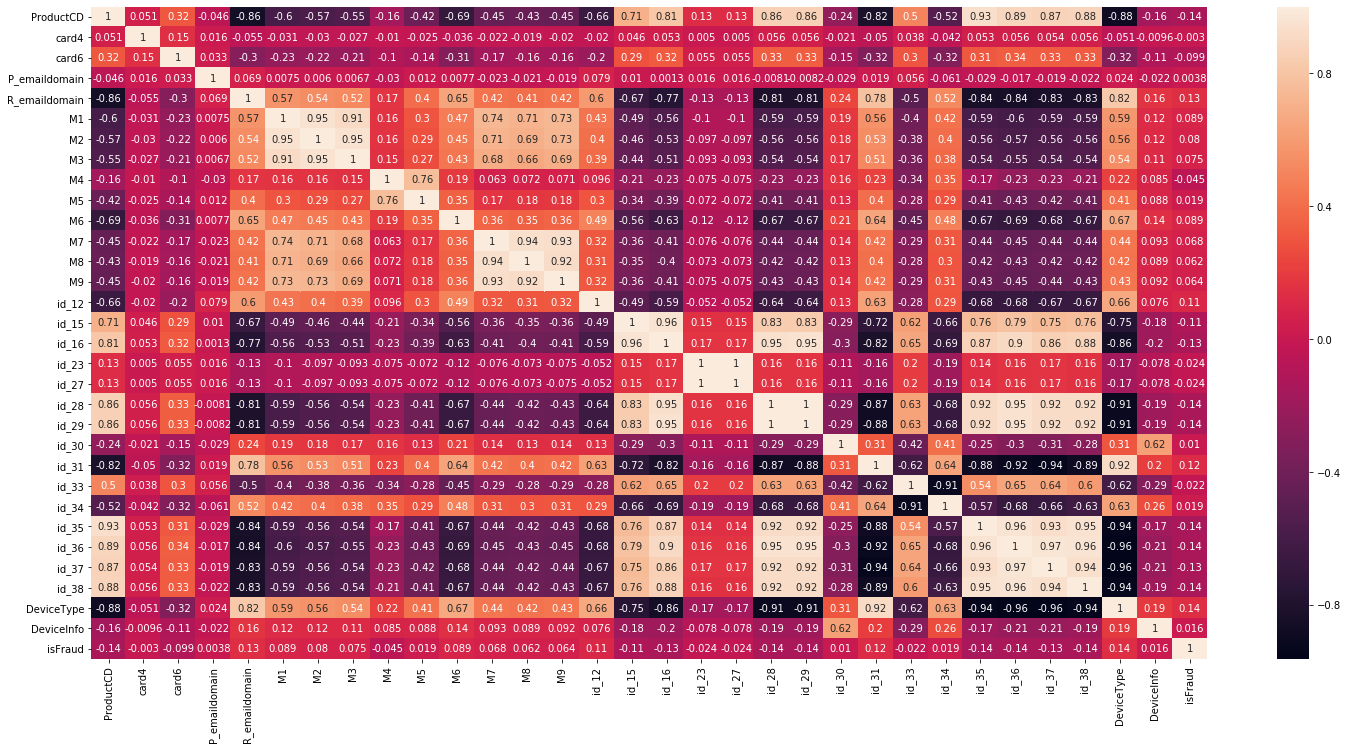

In [50]:
plt.figure(figsize=(25,12))
sns.heatmap(corr_cat, annot=True)

As we can see, very few of these variables on their own correlate to the *isFraud* feature. However, we can easily see some of the various correlations that exist between indiviaual features, both positive and negative correlations. Now lets look at some One-Hot Encoding.

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
one_hot = OneHotEncoder(sparse=False)

In [53]:
one_hot_cat = one_hot.fit(train_join_cat)

In [54]:
cat_one_hot = one_hot.transform(train_join_cat)

In [55]:
cat_one_hot[0:10,0:10]

array([[0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

As you can see by looking at the first ten rows and columns, you can see why it is called "one-hot" encoding (https://en.wikipedia.org/wiki/One-hot). Now, lets get all this data back into a data frame.  

In [56]:
one_hot_features = one_hot.get_feature_names()

In [57]:
cat_one_hot_df = pd.DataFrame(data=cat_one_hot, columns=one_hot_features)

In [58]:
cat_one_hot_df.head()

,x0_C,x0_H,x0_R,x0_S,x0_W,x1_None,x1_american express,x1_discover,x1_mastercard,x1_visa,...,x30_verykoolS5019,x30_verykoolS5524,x30_verykoolS5525,x30_verykoolS5530 Build/LMY47I,x30_verykools4009,x30_verykools5004,x30_verykools5034,x30_verykools5035,x30_vivo,x30_xs-Z47b7VqTMxs
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
cat_one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 2462 entries, x0_C to x30_xs-Z47b7VqTMxs
dtypes: float64(2462)
memory usage: 10.8 GB


As we can see, the number of categorical features has exploded from 31 to 2462. Attempting to look at coorelations using the .concat and .corr() methods in one shot will result in a memory error (I know this because I've tried). So, in order to find the top correlations, we need to use some custom functions to accomplish this.

In [60]:
def second_index(element):
    return abs(element[1])

def get_top_corrs_one_hot(df1, df2, number=10):
    corrs = []
    for column in df1.columns:
        isFraud_corr = pd.concat([df1[column], df2['isFraud']], axis=1).corr()['isFraud'].iloc[0]
        if len(corrs) < number:
            corrs.append((column, isFraud_corr))
            corrs.sort(reverse=True, key=second_index)
        else:
            if abs(isFraud_corr) < abs(min(corrs, key=second_index)[1]):
                continue
            else:
                corrs.pop()
                corrs.append((column, isFraud_corr))
                corrs.sort(reverse=True, key=second_index)
    return corrs

In [61]:
corrs = get_top_corrs_one_hot(cat_one_hot_df, train_join, 20)

In [62]:
corrs

[('x25_F', 0.1650196840486879),
 ('x0_C', 0.16144167435081552),
 ('x4_gmail.com', 0.14997383565926803),
 ('x20_Found', 0.14412271197185572),
 ('x8_M2', 0.1439397034606886),
 ('x19_Found', 0.14197309274584985),
 ('x4_None', -0.14012742721190327),
 ('x16_Found', 0.1398385756360694),
 ('x26_F', 0.1383057422876677),
 ('x15_Found', 0.13732002259395057),
 ('x15_NotKnown', -0.13594436278007288),
 ('x25_Unknown', -0.13594436278007288),
 ('x26_Unknown', -0.13594436278007288),
 ('x27_Unknown', -0.13594436278007288),
 ('x28_Unknown', -0.13594436278007288),
 ('x29_Unknown', -0.1358968816126319),
 ('x19_Unknown', -0.1358655067336536),
 ('x20_Unknown', -0.1358655067336536),
 ('x22_Unknown', -0.13560643525771549),
 ('x0_W', -0.13554944588827092)]

So as we can see, no strong correlations here either. Lets take a look at the numerical features now. 

#### Numerical Null Values

In [63]:
train_num = train_join.drop(columns=train_join_cat.columns)
train_num.drop(columns='isFraud', inplace=True)

In [64]:
train_num.head(10)

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
0,2987000,86400,68.5,13926,NaN,150.0,142.0,315.0,87.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,NaN,...,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,32.0
5,2987005,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,86522,159.0,12308,360.0,150.0,166.0,126.0,87.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,86529,422.5,12695,490.0,150.0,226.0,325.0,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,86535,15.0,2803,100.0,150.0,226.0,337.0,87.0,NaN,...,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,32.0
9,2987009,86536,117.0,17399,111.0,150.0,224.0,204.0,87.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 402 entries, TransactionID to id_32
dtypes: float64(399), int64(3)
memory usage: 1.8 GB


First, we need to do something about these missing values. The missing values could be a significant problem with the train identity set merged into the train transaction set, as most of the transactions do not have corresponding identity information. A solution could be to ignore the identity data entirely, and focus only on filling in the transaction data. For the purpose of this analysis, we will fill in both of these numerical values. The simpliest method is to fill in the missing values with the average for each features. Though this is a good method to start out with, this can become a problem when the feature's data is significantly skewed, thus making the mean to be not the most accurate representation of the feature. In these cases, we will use the median instead. We will use the following loop to fill in these values...

In [66]:
avg_std = train_num.describe().loc['std'].mean()

In [67]:
for column in train_num.columns:
    if train_num[column].std() <= avg_std:
        train_num[column].fillna(train_num[column].mean(), inplace=True)
    else:
        train_num[column].fillna(train_num[column].median(), inplace=True)

First, we get an idea of what the average standard deviation is of the numerical features with the first line by taking the mean of the standard deviation values that are returned by the .describe() method. Second, we cheak the standard deviation of each feature and compare it to the average standard deviation. If it less than or equal to it, we will fill in the null values with the column's mean value. Else, we will fill them in with the column's median value. 

In [68]:
train_num.isnull().sum().sum()

0

Now, the last thing to do is to rejoin the categorical and numerical data. We will use the ordinal categorical data. 

In [69]:
isFraud = train_join['isFraud']

In [70]:
train_join = pd.concat([cat_ordinal_df, train_num], axis=1)

In [71]:
train_join.isnull().sum().sum()

0

Now, we can do some model building. See the modeling notebook for more (WIP) 